# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target) # Probabilmente non utile in qunado viene fatto fitting successivamente su 5 
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # va a fare fitting 5 volte su 5 dataset differenti
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [2]:
from sklearn import neighbors
n_neighbors = 11 #considero 11 vicini e pesano tutti uguali
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]]
0
0 ok setosa
[4.9 3.  1.4 0.2]
[[4.9 3.  1.4 0.2]]
0
1 ok setosa
[4.7 3.2 1.3 0.2]
[[4.7 3.2 1.3 0.2]]
0
2 ok setosa
[4.6 3.1 1.5 0.2]
[[4.6 3.1 1.5 0.2]]
0
3 ok setosa
[5.  3.6 1.4 0.2]
[[5.  3.6 1.4 0.2]]
0
4 ok setosa
[5.4 3.9 1.7 0.4]
[[5.4 3.9 1.7 0.4]]
0
5 ok setosa
[4.6 3.4 1.4 0.3]
[[4.6 3.4 1.4 0.3]]
0
6 ok setosa
[5.  3.4 1.5 0.2]
[[5.  3.4 1.5 0.2]]
0
7 ok setosa
[4.4 2.9 1.4 0.2]
[[4.4 2.9 1.4 0.2]]
0
8 ok setosa
[4.9 3.1 1.5 0.1]
[[4.9 3.1 1.5 0.1]]
0
9 ok setosa
[5.4 3.7 1.5 0.2]
[[5.4 3.7 1.5 0.2]]
0
10 ok setosa
[4.8 3.4 1.6 0.2]
[[4.8 3.4 1.6 0.2]]
0
11 ok setosa
[4.8 3.  1.4 0.1]
[[4.8 3.  1.4 0.1]]
0
12 ok setosa
[4.3 3.  1.1 0.1]
[[4.3 3.  1.1 0.1]]
0
13 ok setosa
[5.8 4.  1.2 0.2]
[[5.8 4.  1.2 0.2]]
0
14 ok setosa
[5.7 4.4 1.5 0.4]
[[5.7 4.4 1.5 0.4]]
0
15 ok setosa
[5.4 3.9 1.3 0.4]
[[5.4 3.9 1.3 0.4]]
0
16 ok setosa
[5.1 3.5 1.4 0.3]
[[5.1 3.5 1.4 0.3]]
0
17 ok setosa

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [3]:
n_neighbors = 11 #considero 11 vicini ma la distanza non è piu uniforme quelli lontano pesano meno
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #Dipendono dalla distanza non più uniform
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy -> non ho piu tutto il dataset ma confronto solo 4 dataset quelli di test li ignoro prima invece confrontavo 1 esempio ocn tutto il dataset 
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

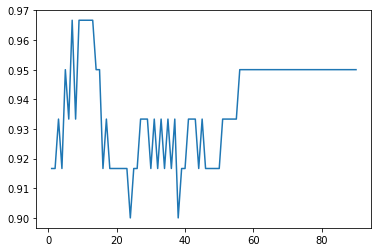

In [4]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0) #il 40% è test set

best_accuracy=0
best_k=1 #idea parto da k = 1 e vado avanti per capire qual è il migliore
A=np.zeros(len(y_train), dtype=float) # inizializzo a 0 un vettore lungo n, ogni indice salvo l'accuratezza di quel K alla fine il minimo mi dirà in base all'inidice il migliore k
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #gli passo il numero dei vicino, cioè scorro i valori possibili
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train) #Eseguo il fit sul train 
    index=n_neighbors-1 #decremento perché parto da 0
    A[index]=clf_knn3.score(X_test, y_test) #qui salvo l'accuratezza per k 
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(np.max(A)))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A) #abbiamo fatto tante prove quanti esempi nel training set, il test set non lo abbiamo usato quindi da 1 alla lungezza del trainig set

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

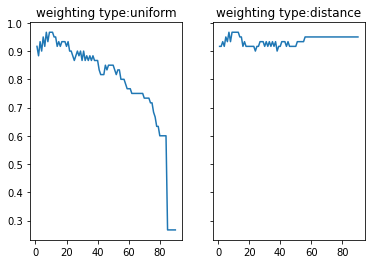

vediamo come con uniforme all'aumentare dei K vicini le prestazioni crollano con pesi che dipendono dalla distanza va meglio


In [5]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()

print("vediamo come con uniforme all'aumentare dei K vicini le prestazioni crollano con pesi che dipendono dalla distanza va meglio")


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95

<ipython-input-6-83b7b4f903f8>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing



k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k neighbors=26
accuracy=0.8833333333333333
k neighbors=27
accuracy=0.9
k neighbors=28
accuracy=0.8833333333333333
k neighbors=29
accuracy=0.9
k neighbors=30
accuracy=0.8666666666666667
k neighbors=31
a

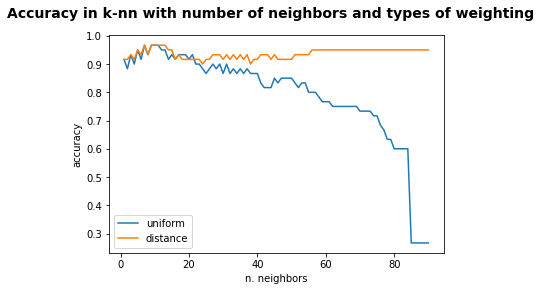

In [6]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


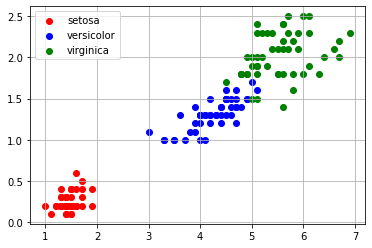

In [18]:
fig, ax = plt.subplots()
colors = {
    "setosa": "red",
    "versicolor": "blue",
    "virginica": "green"
}
for name in range(len(iris.target_names)): # Per ogni classe di iris
    d = iris.data[iris.target == name] # Prendo tutti i dati della classe i
    x = d[:, 2:3] # Ascisse dei punti
    y = d[:, 3:4] # Ordinate dei punti
    ax.scatter(x, y, c=colors[iris.target_names[name]], label=iris.target_names[name]) # Plottiamo i punti

ax.legend() # Ne aggiungiamo una legenda
ax.grid(True) # Aggiungiamo una griglia
plt.show() # Mostriamo il grafico
# Vediamo chiaramente che Versicolor e Virginica sono difficili da classificare in modo corretto


## What you have to do: 
1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


0.9266666666666666


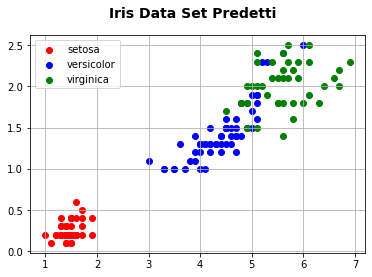

In [20]:
n_neighbors = 7 # Numero di vicini da considerare = 7
my_clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
my_clf_knn.fit(iris.data[:, 0:2], iris.target)
predicted_target = my_clf_knn.predict(iris.data[:, 0:2])
print(my_clf_knn.score(iris.data[:, 0:2], iris.target)) # Media della Accuracy
fig, ax = plt.subplots()
fig.suptitle('Iris Data Set Predetti', fontsize=14, fontweight='bold')
colors = {
    "setosa": "red",
    "versicolor": "blue",
    "virginica": "green"
}
for i in range(len(iris.target_names)):
    d = iris.data[predicted_target == i]
    x = d[:, 2:3] # Ascisse dei punti
    y = d[:, 3:4] # Ordinate dei punti
    ax.scatter(x, y, c=colors[iris.target_names[i]], label=iris.target_names[i])

ax.legend()
ax.grid(True)
plt.show()

2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor
3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  
4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

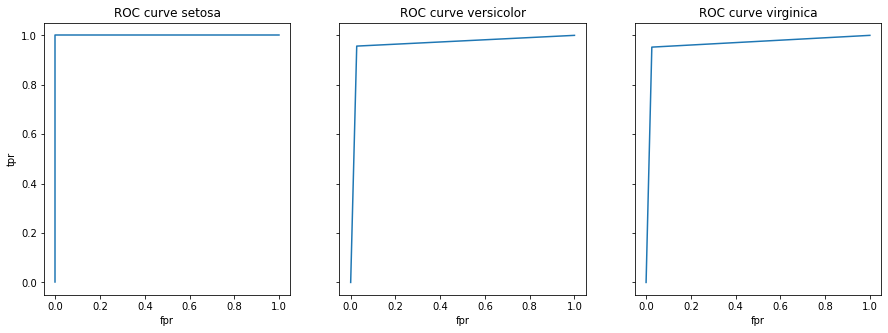

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

for j in range(3):
    y_scores = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(np.where(y_test == j, 1, -1), np.where(y_scores[:, j] > 0.5, 1, -1))
    roc_auc = auc(fpr, tpr)
    axs[j].plot(fpr, tpr)
    axs[j].set_title(f'ROC curve {iris.target_names[j]}')

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.show()

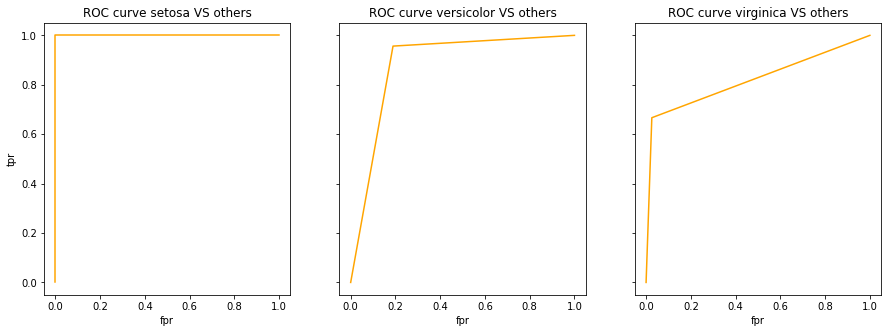

In [10]:
albero_classificazione = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_split=30)
albero_classificazione.fit(X_train, y_train)

# 1 classe +
# -1 classe -

fig2, axs = plt.subplots(1, 3, figsize=(15, 5))

for j in range(3):
    predictions = albero_classificazione.predict(X_test)
    fpr, tpr, _ = roc_curve(np.where(y_test == j, 1, -1), np.where(predictions == j, 1, -1))
    axs[j].plot(fpr, tpr, color='orange')
    axs[j].set_title(f'ROC curve {iris.target_names[j]} VS others')

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

# Nascondiamo le etichette degli assi
for ax in axs.flat:
    ax.label_outer()

fig2.show()

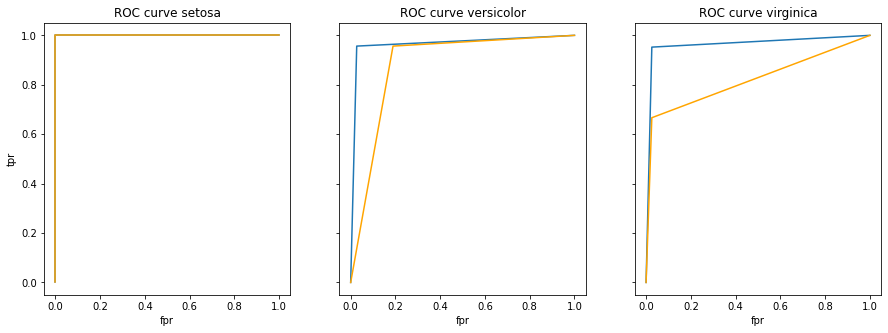

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
albero_classificazione = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_split=30)
albero_classificazione.fit(X_train, y_train)

fig2, axs = plt.subplots(1, 3, figsize=(15, 5))

for j in range(3):
    y_scores = knn.predict_proba(X_test)
    predictions = albero_classificazione.predict(X_test)
    fpr, tpr, threshold = roc_curve(np.where(y_test == j, 1, -1), np.where(y_scores[:, j] > 0.5, 1, -1))
    fpr1, tpr1, _ = roc_curve(np.where(y_test == j, 1, -1), np.where(predictions == j, 1, -1))
    axs[j].plot(fpr, tpr)
    axs[j].plot(fpr1, tpr1, color="orange")
    axs[j].set_title(f'ROC curve {iris.target_names[j]}')

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.show()

5. In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

best gamma= 3
best accuracy= 0.9666666666666667


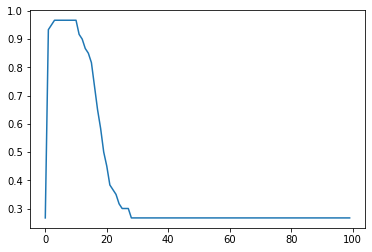

In [21]:
def k(x, y, gamma): # K = exp(-gamma(x-y)^2)
    # Kernel function per RBF (Gaussian radial basis function)
    return np.exp(-(np.linalg.norm((x - y), ord=2) ** 2) / 2 * (gamma ** 2))


def distance(x, y, **kwargs):
    g = kwargs["gamma"]
    # gamma = spread del kernel, ovvero della regione di decisione
    # gamma bassa = regione di decisione più larga
    # gamma alta = regione di decisione più stretta
    return 1 - k(x, y, g) # 1 - K(x,y) = distanza tra i due punti kernelizzata


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
n_neighbors = 7
best_accuracy = 0
best_gamma = 0

accs = []  # Per salvare le accuracy ottenute
for gamma in np.arange(0, 100):
    my_clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric=distance,
                                                metric_params={"gamma": gamma})
    my_clf_knn.fit(X_train, y_train)
    acc = my_clf_knn.score(X_test, y_test)
    accs.append(acc)

    if best_accuracy < acc:
        best_accuracy = acc
        best_gamma = gamma

print(f"best gamma= {str(best_gamma)}")
print(f"best accuracy= {str(best_accuracy)}")

import matplotlib.pyplot as plt

plt.plot(np.arange(0, 100), accs)
plt.show()